# Code Testing 

Notebook for generating test data to simultaneously test/develop helper code. Quicker than implementing full suite of automated testing but still required for development purposes.

In [3]:
%load_ext autoreload
%autoreload 2

import pandas as pd 


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [71]:
#Test - Pricing Signals 
from pricing_signals import PricingSignal, generate_pricing_signal_test_data

In [72]:
pricing_signal = PricingSignal(hedge_lookback = 150, spread_lookback = 100)
#Test Case 1: Static Beta and Intercept, Minimal Noise
test_data = generate_pricing_signal_test_data(n_regimes = 1, regime_betas = [2], noise_std = 0.01, intercept = 2)
intercept, beta = pricing_signal._calculate_hedge_ratio(x = test_data['x'], y= test_data['y'])

/Users/vivbear/Documents/Quant_Research/Projects/pairs_trading_cryptocurrency/pricing_signals.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  import statsmodels.api as sm
100%|██████████| 50/50 [00:00<00:00, 2116.58it/s]


In [73]:
intercept.describe()

count    50.000000
mean      1.998928
std       0.008537
min       1.982777
25%       1.993803
50%       2.001444
75%       2.003503
max       2.017185
dtype: float64

In [74]:
beta.describe()

count    50.000000
mean      2.000035
std       0.000209
min       1.999580
25%       1.999924
50%       1.999975
75%       2.000159
max       2.000428
dtype: float64

<Axes: >

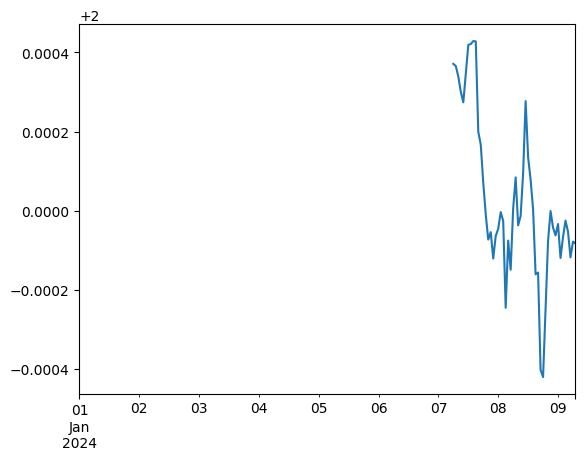

In [75]:
#Why does plot look so different? 
beta.plot()

In [80]:
#No intercept 
pricing_signal = PricingSignal(hedge_lookback = 30, spread_lookback = 30)
test_data = generate_pricing_signal_test_data(n_periods = 200, n_regimes = 2, regime_betas = [2, 6], noise_std = 0.01, intercept = 0)
intercept, beta = pricing_signal._calculate_hedge_ratio(x = test_data['x'], y= test_data['y'], fit_intercept=False)

/Users/vivbear/Documents/Quant_Research/Projects/pairs_trading_cryptocurrency/pricing_signals.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  import statsmodels.api as sm
100%|██████████| 170/170 [00:00<00:00, 6513.97it/s]


<Axes: >

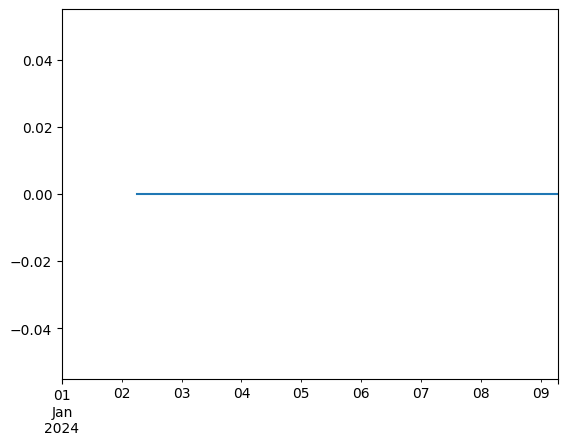

In [81]:
intercept.plot()

<Axes: >

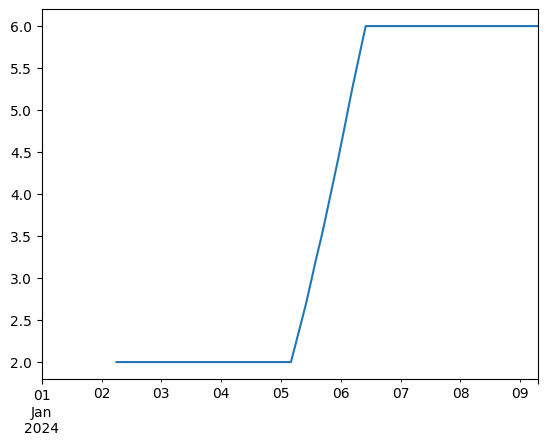

In [82]:
beta.plot()

In [77]:
#Test Case 2: Regime change 
pricing_signal = PricingSignal(hedge_lookback = 30, spread_lookback = 30)
test_data = generate_pricing_signal_test_data(n_periods = 200, n_regimes = 2, regime_betas = [2, 6], noise_std = 0.01, intercept = 2)
intercept, beta = pricing_signal._calculate_hedge_ratio(x = test_data['x'], y= test_data['y'])

/Users/vivbear/Documents/Quant_Research/Projects/pairs_trading_cryptocurrency/pricing_signals.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  import statsmodels.api as sm


100%|██████████| 170/170 [00:00<00:00, 2530.97it/s]


<Axes: >

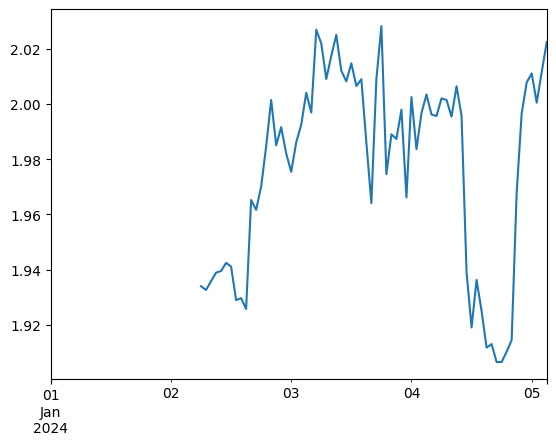

In [78]:
intercept[:100].plot()

<Axes: >

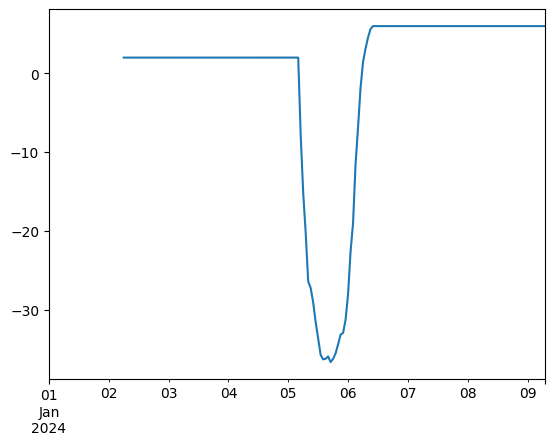

In [79]:
beta.plot()

In [83]:
#Test - Trading Strategy 
from trading_strategy import BollingerBandTradeStrategy, generate_synthetic_zscore

In [ ]:
#Test - Portfolio Manager 